# Employee Retention Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("employee_retention_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


## Headcounts for each company

In [4]:
# change the data type
df['join_date'] = pd.to_datetime(df['join_date'])
df['quit_date'] = pd.to_datetime(df['quit_date'])

In [5]:
datelist = pd.date_range('2011-01-23', '2015-12-23').tolist()


In [6]:
company_id = df.company_id.unique()

In [7]:
company_id

array([ 7,  4,  2,  9,  1,  6, 10,  5,  3,  8, 11, 12], dtype=int64)

In [8]:
company_id.sort()

In [9]:
column = ['day','employee_headcount','company_id']

In [10]:
headcount = pd.DataFrame(columns = column)

In [11]:
# find the employee headcount for each date and each company
for date in datelist:
    for cid in company_id:
        count = df['company_id'][(df.join_date <= date) & ((df.quit_date > date)|(df.quit_date.isnull()))& (df.company_id == cid)].count()
        
        headcount = headcount.append({'day':date,'employee_headcount':count, 'company_id':cid}, ignore_index = True)

In [12]:
headcount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21552 entries, 0 to 21551
Data columns (total 3 columns):
day                   21552 non-null datetime64[ns]
employee_headcount    21552 non-null float64
company_id            21552 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 505.2 KB


In [12]:
headcount.to_csv('headcount.csv')

## Main Factors thar drive employee churn

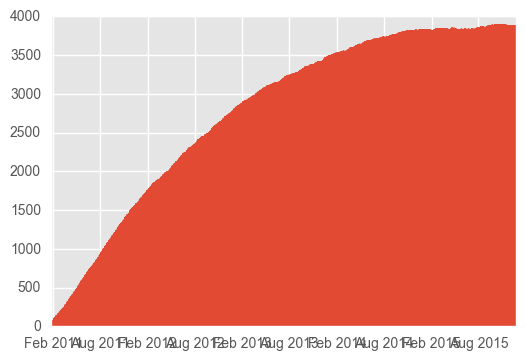

In [13]:
# let's see the headcount over time in general
plt.plot(headcount.day,headcount.employee_headcount)

Looks like the headcounts are increasing over time for those companies.

In [14]:
headcount['month']=headcount['day'].dt.month

<Container object of 21552 artists>

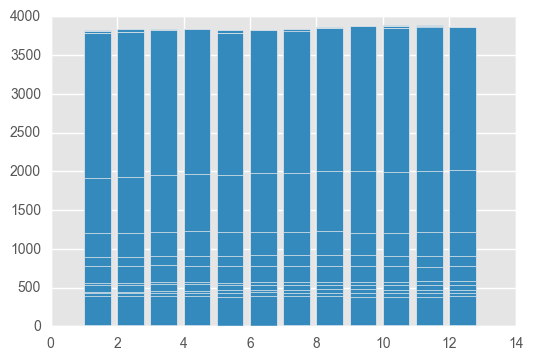

In [15]:
plt.bar(headcount.month,headcount.employee_headcount)

There are not much difference between months in terms of headcounts. There is no seasonality here.

In [16]:
headcount2=headcount.pivot(index = 'day',columns='company_id', values='employee_headcount')

In [17]:
headcount2 = headcount2.reset_index()

In [18]:
headcount2.head()

company_id,day,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,2011-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-24,25.0,17.0,9.0,12.0,5.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2,2011-01-25,27.0,19.0,10.0,12.0,5.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
3,2011-01-26,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
4,2011-01-27,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0


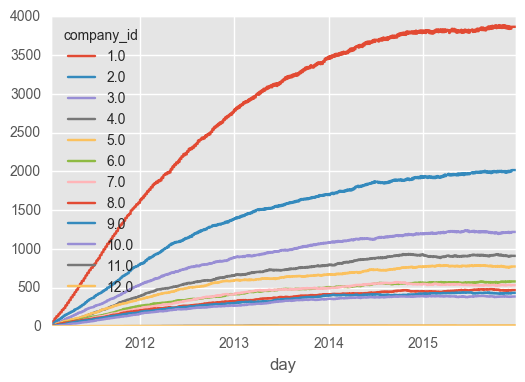

In [19]:
headcount2.plot.line(x='day',y=company_id.sort())
plt.show()

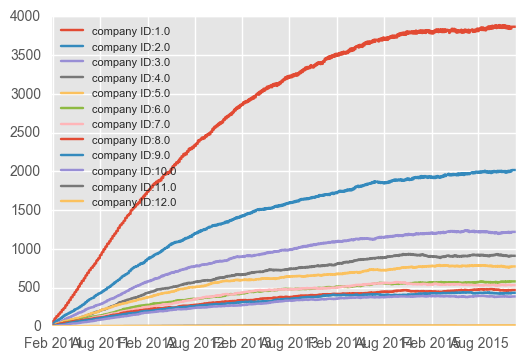

In [20]:
grouped = headcount.groupby('company_id')
for company, group in grouped:
    plt.plot(group['day'], group['employee_headcount'], label='company ID:{}'.format(company))
    plt.legend(loc='best', fontsize=8)

When we break down the headcounts into different companies, we still see the overall trends of increase. The company with the most headcounts are company 1.

In [21]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


Now, I'm going to go after the length of employment for each employees.

In [22]:
df = df.fillna(pd.datetime(2015,12,23))

In [23]:
df['length'] = df.quit_date - df.join_date

In [24]:
df['length'] = df['length'].dt.days 

In [25]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-23,436
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 8 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      24702 non-null datetime64[ns]
length         24702 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 1.5+ MB


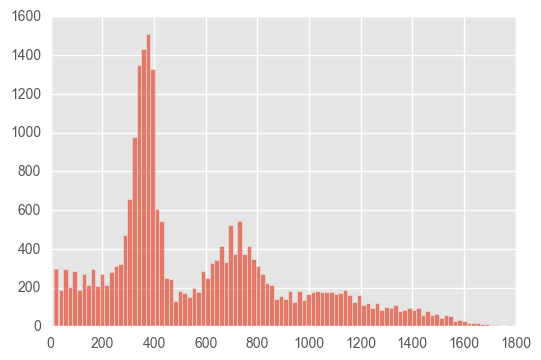

In [27]:
plt.hist(df.length, bins =100,alpha=0.7)
plt.show()

In [28]:
df.length.mode()

0    375
dtype: int64

Based on the histgram, we can easily see 2 spikes. One is around 375, and the other is around 775. I'm going to split the employees into three groups. One is who stay in the company for 450 days or less, another is who stay in the company for more than 450 days but less than 850 days. The rest are the third groups.

In [29]:
df['first'] = np.where((df['length'] >= 0)&(df['length'] <= 425), 1, 0)

In [30]:
df['second'] = np.where((df['length'] > 425)&(df['length'] <= 850), 1, 0)

In [31]:
conditions = [(df['length'] >= 0)&(df['length'] <= 425),(df['length'] > 425)&(df['length'] <= 850)]
choices = [1, 2]
df['length_group'] = np.select(conditions, choices, default=0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 11 columns):
employee_id     24702 non-null float64
company_id      24702 non-null int64
dept            24702 non-null object
seniority       24702 non-null int64
salary          24702 non-null float64
join_date       24702 non-null datetime64[ns]
quit_date       24702 non-null datetime64[ns]
length          24702 non-null int64
first           24702 non-null int32
second          24702 non-null int32
length_group    24702 non-null int32
dtypes: datetime64[ns](2), float64(2), int32(3), int64(3), object(1)
memory usage: 1.8+ MB


In [33]:
df.groupby('length_group').count()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,length,first,second
length_group,,,,,,,,,,
0,5116,5116,5116,5116,5116,5116,5116,5116,5116,5116
1,12368,12368,12368,12368,12368,12368,12368,12368,12368,12368
2,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218


Now we can see that 12368 people who only stay in company less than 450 days. There are 7218 people who stay at company for more than 450 days and less than 850 days.

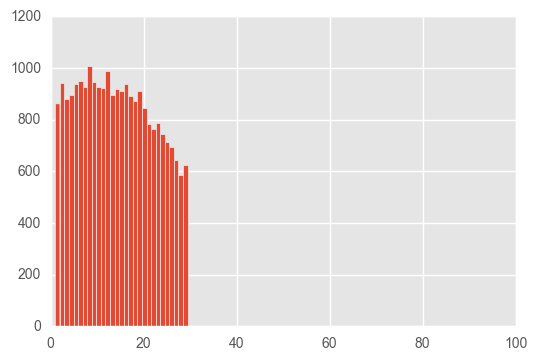

In [34]:
df.seniority.hist(bins = 100)

Looks like seniority is flat before 10 years, and much less when it comes to 10 to 20 years.

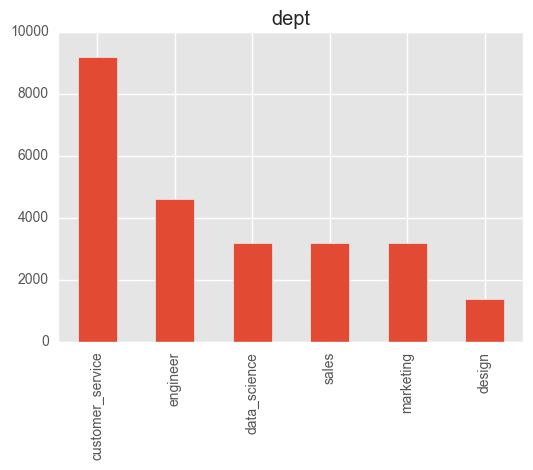

In [35]:
df.dept.value_counts().plot(kind = 'bar')
plt.title('dept')

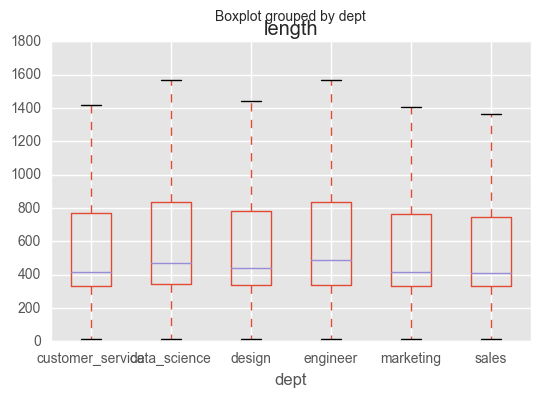

In [36]:
df.boxplot(column = 'length', by = 'dept')

Based on boxplot, engineer department has the highest median of length of employeement among all the departments. However, there are not much difference.

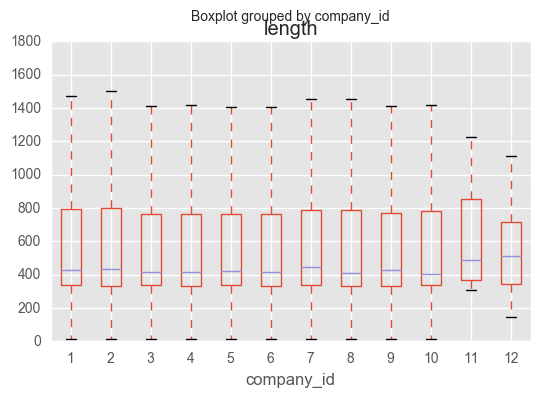

In [37]:
df.boxplot(column = 'length', by = 'company_id')

Based on boxplot, company 12 and 11 have the highest median of length of employeement among all the companies. However, there are not much difference.

Let's train the model and see what we can get.

In [38]:
df_dept = pd.get_dummies(df['dept'],prefix = 'dept')
df = pd.concat([df,df_dept],axis = 1)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,length,first,second,length_group,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,0,1,2,1,0,0,0,0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,1,0,1,0,0,0,0,1,0
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-23,436,0,1,2,0,0,0,0,1,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,1,0,1,1,0,0,0,0,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,0,0,0,0,1,0,0,0,0


In [39]:
X = df[['company_id','seniority','salary','dept_customer_service','dept_data_science','dept_design',
        'dept_engineer','dept_marketing','dept_sales']]
y = df['length_group']

In [40]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

C:\Users\Ruofei\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ruofei\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [41]:
#refit model with best parameters
dec = DecisionTreeClassifier()
dec.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

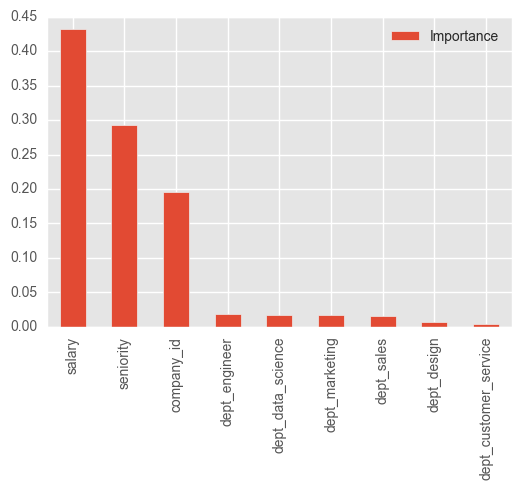

In [42]:
importance = dec.feature_importances_
feature_names = X.columns.values 
df1 = pd.DataFrame(importance,columns=['Importance'],index = feature_names)
df1 = df1.sort_values(['Importance'],ascending=False)
df1.plot(kind = 'bar')

In [43]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver = 'newton-cg', max_iter  = 10000, penalty = 'l2')
lg.fit(X,y)

C:\Users\Ruofei\Anaconda2\lib\site-packages\scipy\optimize\linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Ruofei\Anaconda2\lib\site-packages\scipy\optimize\linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Ruofei\Anaconda2\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
importance = lg.coef_.T
feature_names = X.columns.values 


In [54]:
lg.coef_.T[:,0]

array([  4.47345188e-03,  -1.68890324e-02,   3.10430631e-06,
        -8.95151254e-02,  -1.80064870e-01,  -2.43919182e-01,
        -1.99319937e-01,  -2.88373523e-01,  -3.39687362e-01])

In [56]:
lg.classes_

array([0, 1, 2])

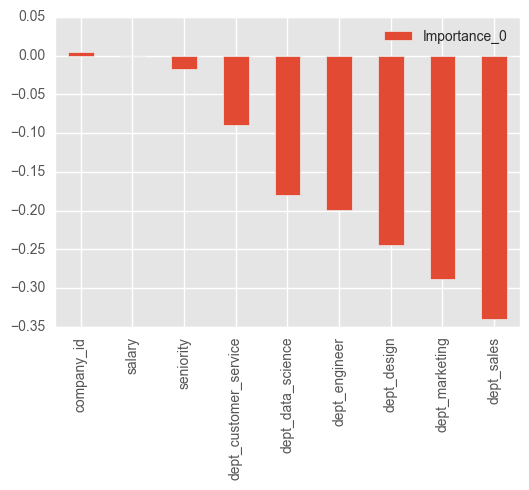

In [60]:
df0 = pd.DataFrame(importance[:,0],columns=['Importance_0'],index = feature_names)
df0 = df0.sort_values(['Importance_0'],ascending=False)
df0.plot(kind = 'bar')

In this plot, those people are who stay in the same company for 850 days or longer. We can see that for sales, marketing, design and data science departments, they have negative impact to keep people longer there. My recommendation would be to focus on those departments.

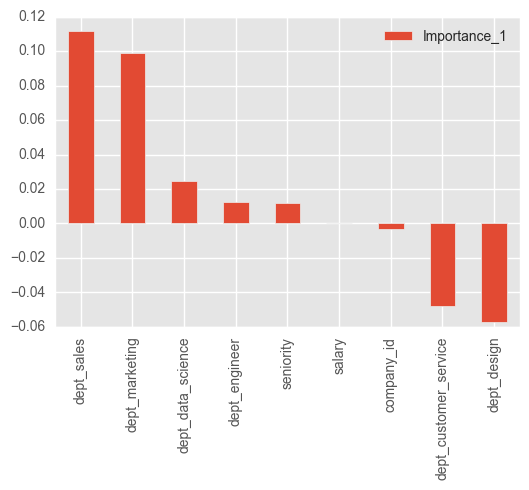

In [61]:
df1 = pd.DataFrame(importance[:,1],columns=['Importance_1'],index = feature_names)
df1 = df1.sort_values(['Importance_1'],ascending=False)
df1.plot(kind = 'bar')

In this plot, people are who stay less than 450 days (and majority are actually around 375 days). The rational behind it maybe that people get their bonus and RSU a year later, then they left. Still, we can see that sales and marketing deparment have a lot of those people which make sense because those departments usually have the highest turnover rate. However, in this case, customer service and design departments have better performance in this catogory.

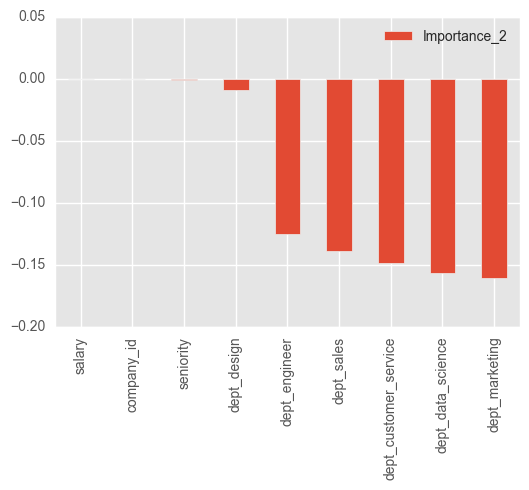

In [63]:
df2 = pd.DataFrame(importance[:,2],columns=['Importance_2'],index = feature_names)
df2 = df2.sort_values(['Importance_2'],ascending=False)
df2.plot(kind = 'bar')

People who stay longer than 425 days and less than 850 days have the same pattern with people stay longer than 850 days in the logistic regression.

## Conclusions

Based on all the explortary and predictive analysis above, I would make followering recommendations:
* Focused on sales, marketing, design and data science departments, especially sales and marketing, since they have very huge negative impact on the employee retention.
* According to the result from decision tree, salary and seniority are the most important features to predict the length of employeement. So my suggestions would be to collect the data about employee's new offer and also update their seniority in database to match their market value.
* There are a lot of people who left the company around 1 year to 1.2 year since they join the company. I would recommend to have some kind of retention bonous or other kinds of incentives to keep employee stay here. But of course, we need do more cost/benefit analysis about it.
* I would also recommend to get data about promotion, bonus, RSU and etc to get a full picture of the employee, which could result in more accurate and complete analysis.

In [64]:
from sklearn.externals import joblib
joblib.dump(dec, 'dec.pkl')

['dec.pkl']

In [65]:
dec = joblib.load('dec.pkl')

In [66]:
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.externals import joblib

In [ ]:
Source(export_graphviz(dec, out_file=None, feature_names=X.columns ))